# Stage 09 — Homework Starter Notebook

In the lecture, we learned how to create engineered features. Now it’s your turn to apply those ideas to your own project data.

In [9]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 6.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [15]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

## Implemented 2 engineered features here

In [31]:
df.columns[-50:]

Index(['US_Stock_VT_adj_volume', 'US_Stock_VTV_adj_volume',
       'US_Stock_VWO_adj_volume', 'US_Stock_VXUS_adj_volume',
       'US_Stock_VYM_adj_volume', 'US_Stock_WMB_adj_volume',
       'US_Stock_WPM_adj_volume', 'US_Stock_X_adj_volume',
       'US_Stock_XLB_adj_volume', 'US_Stock_XLE_adj_volume',
       'US_Stock_XOM_adj_volume', 'US_Stock_YINN_adj_volume', 'FX_AUDJPY',
       'FX_AUDUSD', 'FX_CADJPY', 'FX_CHFJPY', 'FX_EURAUD', 'FX_EURGBP',
       'FX_EURJPY', 'FX_EURUSD', 'FX_GBPAUD', 'FX_GBPJPY', 'FX_GBPUSD',
       'FX_NZDJPY', 'FX_NZDUSD', 'FX_USDCHF', 'FX_USDJPY', 'FX_ZARJPY',
       'FX_ZARUSD', 'FX_NOKUSD', 'FX_NOKEUR', 'FX_CADUSD', 'FX_AUDNZD',
       'FX_EURCHF', 'FX_EURCAD', 'FX_AUDCAD', 'FX_GBPCHF', 'FX_EURNZD',
       'FX_AUDCHF', 'FX_GBPNZD', 'FX_GBPCAD', 'FX_CADCHF', 'FX_NZDCAD',
       'FX_NZDCHF', 'FX_ZAREUR', 'FX_NOKGBP', 'FX_NOKCHF', 'FX_ZARCHF',
       'FX_NOKJPY', 'FX_ZARGBP'],
      dtype='object')

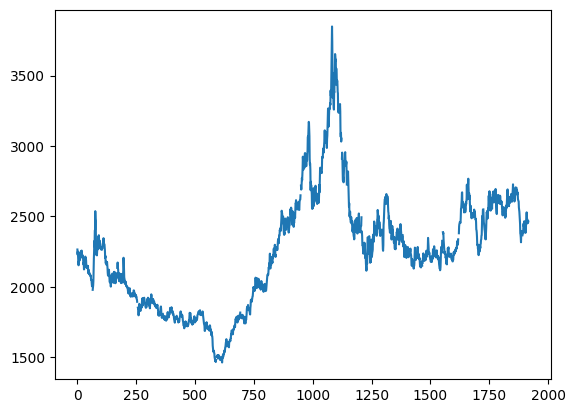

In [19]:
df["LME_AH_Close"].plot()
plt.show()

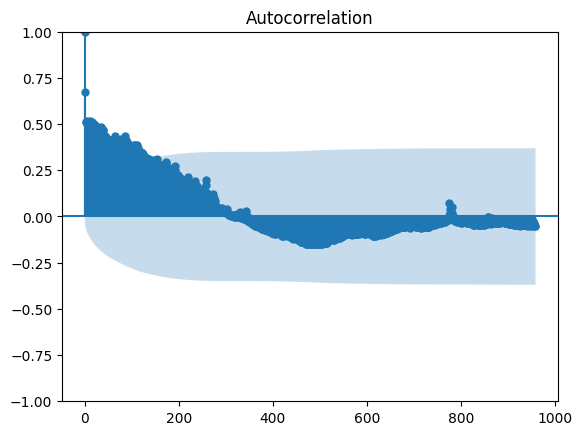

In [24]:
plot_acf(df['LME_AH_Close'].fillna(0), lags = len(df) // 2)
plt.show()

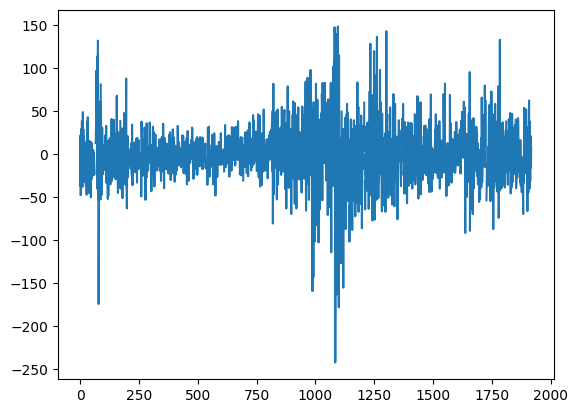

In [29]:
df["LME_AH_Close"].diff(1).plot()
plt.show()

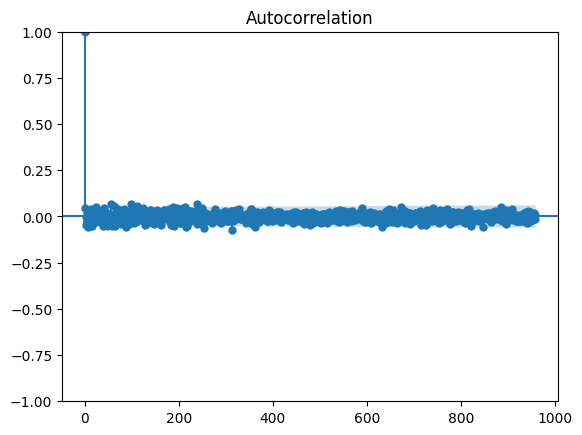

In [30]:
plot_acf(df['LME_AH_Close'].diff(1).fillna(0), lags = len(df) // 2)
plt.show()

In [35]:
df["LME_AH_Close_diff_1"] = df['LME_AH_Close'].diff(1).fillna(0)

### Rationale for Feature 1
Fixed high autocorrelation

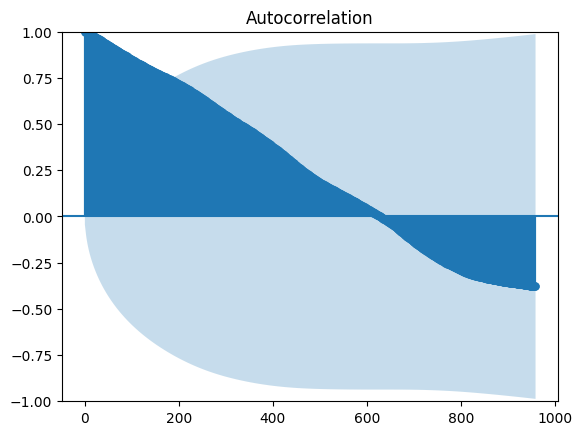

In [50]:
plot_acf(df["FX_USDJPY"].fillna(0), lags = len(df) // 2)
plt.show()

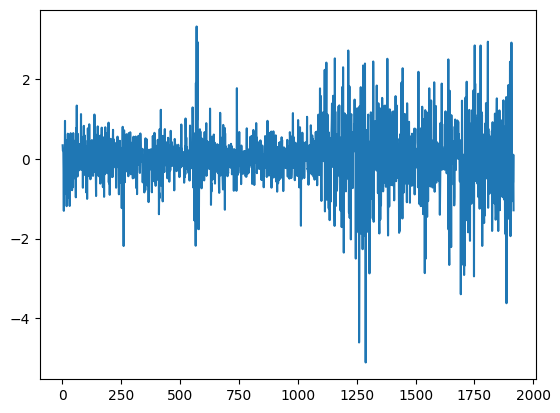

In [42]:
df["FX_USDJPY"].diff(1).plot()
plt.show()

/var/folders/ld/dywjpymn2xqdrbtbvpvv9xhm0000gn/T/ipykernel_30150/1279863264.py:1: RuntimeWarning: invalid value encountered in log10
  df["FX_USDJPY"].diff(1).apply(lambda x : np.log10(x)).plot()
/var/folders/ld/dywjpymn2xqdrbtbvpvv9xhm0000gn/T/ipykernel_30150/1279863264.py:1: RuntimeWarning: divide by zero encountered in log10
  df["FX_USDJPY"].diff(1).apply(lambda x : np.log10(x)).plot()


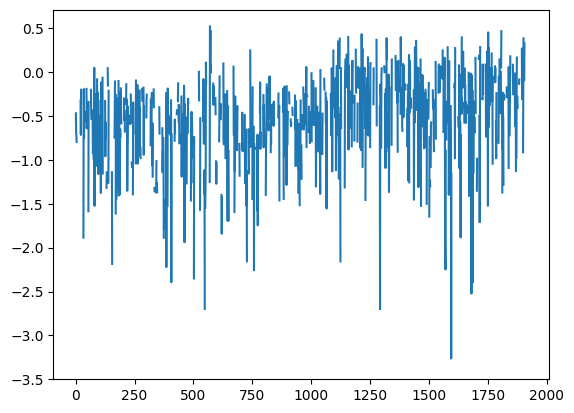

In [46]:
df["FX_USDJPY"].diff(1).apply(lambda x : np.log10(x)).plot()
plt.show()

In [48]:
df["FX_USDJPY_log10"] = df["FX_USDJPY"].diff(1).apply(lambda x : np.log10(x))

/var/folders/ld/dywjpymn2xqdrbtbvpvv9xhm0000gn/T/ipykernel_30150/4099781719.py:1: RuntimeWarning: invalid value encountered in log10
  df["FX_USDJPY_log10"] = df["FX_USDJPY"].diff(1).apply(lambda x : np.log10(x))
/var/folders/ld/dywjpymn2xqdrbtbvpvv9xhm0000gn/T/ipykernel_30150/4099781719.py:1: RuntimeWarning: divide by zero encountered in log10
  df["FX_USDJPY_log10"] = df["FX_USDJPY"].diff(1).apply(lambda x : np.log10(x))


### Rationale for Feature 2
Fixed autocorrelations and stabilized variance for USD JPY FX